In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from textacy import preprocessing


# **Statement 2**

In [2]:
statement = """5. The Council shall: (a) develop and recommend a food policy for the State which recognizes that it is in the best interests of the State to ensure the availability of an adequate supply of affordable, fresh, nutritious food to its residents; (b) develop and recommend State policies to expand agricultural production, including locally-grown and organically-grown food; (c) develop and recommend a strategic plan for implementation of the State food policy, including benchmarks and criteria for measuring progress in achieving State food policy objectives; and (d) offer comments on State regulations, legislation and budget proposals in the area of food policy, to ensure a coordinated and comprehensive inter-agency approach to food policy issues."""
import re
statement1 = re.sub("\([a-z]\)|([0-9]\.)","", statement)
statement = preprocessing.normalize_whitespace(statement1)
statement

'The Council shall: develop and recommend a food policy for the State which recognizes that it is in the best interests of the State to ensure the availability of an adequate supply of affordable, fresh, nutritious food to its residents; develop and recommend State policies to expand agricultural production, including locally-grown and organically-grown food; develop and recommend a strategic plan for implementation of the State food policy, including benchmarks and criteria for measuring progress in achieving State food policy objectives; and offer comments on State regulations, legislation and budget proposals in the area of food policy, to ensure a coordinated and comprehensive inter-agency approach to food policy issues.'

In [3]:
doc = nlp(u"The Council shall: develop and recommend a food policy for the State which recognizes that it is in the best interests of the State to ensure the availability of an adequate supply of affordable, fresh, nutritious food to its residents; develop and recommend State policies to expand agricultural production, including locally-grown and organically-grown food; develop and recommend a strategic plan for implementation of the State food policy, including benchmarks and criteria for measuring progress in achieving State food policy objectives; and offer comments on State regulations, legislation and budget proposals in the area of food policy, to ensure a coordinated and comprehensive inter-agency approach to food policy issues.")

In [4]:
print([w.text for w in doc])

['The', 'Council', 'shall', ':', 'develop', 'and', 'recommend', 'a', 'food', 'policy', 'for', 'the', 'State', 'which', 'recognizes', 'that', 'it', 'is', 'in', 'the', 'best', 'interests', 'of', 'the', 'State', 'to', 'ensure', 'the', 'availability', 'of', 'an', 'adequate', 'supply', 'of', 'affordable', ',', 'fresh', ',', 'nutritious', 'food', 'to', 'its', 'residents', ';', 'develop', 'and', 'recommend', 'State', 'policies', 'to', 'expand', 'agricultural', 'production', ',', 'including', 'locally', '-', 'grown', 'and', 'organically', '-', 'grown', 'food', ';', 'develop', 'and', 'recommend', 'a', 'strategic', 'plan', 'for', 'implementation', 'of', 'the', 'State', 'food', 'policy', ',', 'including', 'benchmarks', 'and', 'criteria', 'for', 'measuring', 'progress', 'in', 'achieving', 'State', 'food', 'policy', 'objectives', ';', 'and', 'offer', 'comments', 'on', 'State', 'regulations', ',', 'legislation', 'and', 'budget', 'proposals', 'in', 'the', 'area', 'of', 'food', 'policy', ',', 'to', 'e

In [5]:
import pandas as pd
pst = pd.DataFrame([[w.text,w.tag_,w.pos_, w.dep_] for w in  doc])
pst.columns = ['Text', "Part_of_Speech", "Speech", "Dependency"]
pst.to_csv("Sentence 2 Tagging.csv")

#### Extracting the Root of the Sentence

##### *Parsing the Tree*

In [6]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

The det Council PROPN []
Council nsubj develop VERB [The]
shall aux develop VERB []
: punct develop VERB []
develop ROOT develop VERB [Council, shall, :, and, recommend, ;, develop, .]
and cc develop VERB []
recommend conj develop VERB [policy]
a det policy NOUN []
food compound policy NOUN []
policy dobj recommend VERB [a, food, for, recognizes]
for prep policy NOUN [State]
the det State NOUN []
State pobj for ADP [the]
which nsubj recognizes VERB []
recognizes relcl policy NOUN [which, is]
that mark is AUX []
it nsubj is AUX []
is ccomp recognizes VERB [that, it, in, ensure]
in prep is AUX [interests]
the det interests NOUN []
best amod interests NOUN []
interests pobj in ADP [the, best, of]
of prep interests NOUN [State]
the det State PROPN []
State pobj of ADP [the]
to aux ensure VERB []
ensure xcomp is AUX [to, availability]
the det availability NOUN []
availability dobj ensure VERB [the, of, to]
of prep availability NOUN [supply]
an det supply NOUN []
adequate amod supply NOUN []

In [7]:
lefts = []
rights = []
for w in doc:
  if w.dep_ == "ROOT":
    i = w.i
    for lc in doc[i].lefts:
      if lc.n_lefts >= 1 :
        for lcc in lc.lefts:
          lefts.append(lcc.text)
        lefts.append(lc.text)
      else:
        lefts.append(lc.text)
    for rc in doc[i].rights:
        if rc.n_rights >= 1 :
            if rc.dep_ == "CC":
                continue
            if (rc.dep_ == "CONJ") & (rc.pos_ == "VERB"):
                continue
            else:
                rights.append(rc.text)
part_one = " ".join([str(token) for token in lefts])

In [8]:
part_one = re.sub(r'[^a-zA-Z0-9\s-]', '',part_one)
part_one


'The Council shall '

In [9]:
def inorderTraversal(token, root):
    res = []
    for left in token.lefts:
      res = inorderTraversal(left,root)
    res.append(str(token.text))
    for right in token.rights:
      if right.text == root :
        continue
      if (right.dep_ == "PUNCT"):
        continue
      else:
        res = res + inorderTraversal(right,root)
    return res

for token in doc:
    if token.dep_ == "ROOT":
        root = token.text
sentence = []
for token in doc:
    if (token.text == root):
        sentence.append(part_one  + " ".join(inorderTraversal(token, root)))
    

In [10]:
import re
for i in sentence:
    new = re.sub(r'[^a-zA-Z0-9\s-]', '',i)
    new = preprocessing.normalize_whitespace(new)
    print(new)
    print("\n")

The Council shall develop and recommend food policy for the State which recognizes it is in best interests of the State to ensure the availability of adequate supply of nutritious food to its residents


The Council shall develop and recommend State policies to expand agricultural production including - grown and - grown food


The Council shall develop and recommend strategic plan for implementation of food policy including benchmarks and criteria for measuring progress in achieving food policy objectives and offer comments on State regulations legislation and budget proposals in the area of food policy to ensure inter - agency approach to food policy issues




## Statement 1

In [11]:
doc = nlp(u"The Council shall consist of twenty-one members appointed by the Governor as follows: the Commissioner of Agriculture and Markets, the Commissioner of Health, the Commissioner of the Office of Temporary Disability Assistance, the Commissioner of Education, the Commissioner of the Department of Economic Development and the Director of the Office for the Aging")

In [12]:
import pandas as pd
pst = pd.DataFrame([[w.text,w.tag_,w.pos_, w.dep_] for w in  doc])
pst.columns = ['Text', "Part_of_Speech", "Speech", "Dependency"]
pst

,Text,Part_of_Speech,Speech,Dependency
0,The,DT,DET,det
1,Council,NNP,PROPN,nsubj
2,shall,MD,VERB,aux
3,consist,VB,VERB,ROOT
4,of,IN,ADP,prep
5,twenty,CD,NUM,compound
6,-,HYPH,PUNCT,punct
7,one,CD,NUM,nummod
8,members,NNS,NOUN,pobj
9,appointed,VBN,VERB,acl


In [13]:
lefts = []
rights = []
for w in doc:
  if w.dep_ == "ROOT":
    i = w.i
    for lc in doc[i].lefts:
      if lc.n_lefts >= 1 :
        for lcc in lc.lefts:
          lefts.append(lcc.text)
        lefts.append(lc.text)
      else:
        lefts.append(lc.text)
    lefts.append(doc[i])
    for rc in doc[i].rights:
      if rc.n_rights >= 1 :
        lefts.append(rc.text)
part_one = " ".join([str(token) for token in lefts])

In [14]:
sentences = []

def inorderTraversal(chunk):
    res = []
    for left in chunk.lefts:
      res = inorderTraversal(left)
    res.append(str(chunk.text))
    for right in chunk.rights:
      if (right.dep_ == "conj") & (right.pos_ == "PROPN") & (right.n_rights >= 1):
        continue
      if (right.dep_ == "appos") & (right.pos_ == "PROPN") & (right.n_rights >= 1):
        continue
      if (right.dep_ == "cc") & (right.pos_ == "CCONJ") & (right.head.dep_ == "conj") & (right.head.pos_ == "PROPN"):
        continue
      if (right.dep_ == "advcl") & (right.pos_ == "VERB"):
        continue
      if (right.dep_ == "PUNCT"):
        continue
      else:
        res = res + inorderTraversal(right)
    return res


for chunk in doc.noun_chunks:
  # The chunks dont have a left tree so there is no left list
  if (chunk.root.dep_ == "conj") & (chunk.root.pos_ =="PROPN") & (chunk.root.n_rights >= 1): # Only selecting the commisoner and directors 
    sentences.append(part_one + " " + " ".join(inorderTraversal(chunk)) )      
  if (chunk.root.dep_ == "appos") & (chunk.root.pos_ =="PROPN") & (chunk.root.n_rights >= 1): # Only selecting the commisoner and directors 
    sentences.append(part_one + " " + " ".join(inorderTraversal(chunk)) )   
  if (chunk.root.dep_ == "pobj") & (chunk.root.pos_ =="NOUN") & (chunk.root.n_rights >= 1): # Only selecting the commisoner and directors 
    sentences.append(part_one + " " + " ".join(inorderTraversal(chunk)) )   

### Statement 3

In [15]:
statement = """The Council shall issue a written report on the first day of December each year on: (a) the activities of the Council during the preceding year; (b) recommended food policies for the State; (c) recommended changes to the strategic plan; (d) an account of the progress made in achieving the goals of the Council; and (e) actions which are necessary to implement the recommendations of the Council and effectuate the purposes of this Order.
"""
import re
statement1 = re.sub("\([a-z]\)|[0-9]\)|\n","", statement)
statement = preprocessing.normalize_whitespace(statement1)
statement

'The Council shall issue a written report on the first day of December each year on: the activities of the Council during the preceding year; recommended food policies for the State; recommended changes to the strategic plan; an account of the progress made in achieving the goals of the Council; and actions which are necessary to implement the recommendations of the Council and effectuate the purposes of this Order.'

In [16]:
doc = nlp(statement)

In [17]:
doc

The Council shall issue a written report on the first day of December each year on: the activities of the Council during the preceding year; recommended food policies for the State; recommended changes to the strategic plan; an account of the progress made in achieving the goals of the Council; and actions which are necessary to implement the recommendations of the Council and effectuate the purposes of this Order.

In [18]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [19]:
lefts = []
rights = []
for w in doc:
  if w.dep_ == "ROOT":
    i = w.i
    for lc in doc[i].lefts:
      if lc.n_lefts >= 1 :
        for lcc in lc.lefts:
          lefts.append(lcc.text)
        lefts.append(lc.text)
      else:
        continue
part_one = " ".join([str(token) for token in lefts])

In [20]:
part_one

'The Council'

In [21]:
def inorderTraversal1(token):
    res = []
    for left in token.lefts:
        res = inorderTraversal1(left)
    res.append(str(token.text))
    for right in token.rights:
        if (right.dep_ == "dobj") & (right.pos_ == "NOUN") & (right.n_rights >= 1):
            continue
        if (right.dep_ == "advcl") & (right.pos_ == "VERB")& (right.n_rights >= 1):
            continue
        if (right.dep_ == "conj") & (right.pos_ == "VERB")& (right.n_rights >= 1):
            continue      
        if (right.dep_ == "npadvmod") & (right.pos_ == "NOUN")& (right.n_rights >= 1):
            continue
        else:
            res = res + inorderTraversal1(right)
    return res

for token in doc:
     if token.dep_ == "ROOT":
            part_one1 = (part_one + " " + " ".join(inorderTraversal1(token)))

    

    

In [22]:
part_one1 = re.sub(r'[^a-zA-Z0-9\s-]', '',part_one1)
part_one1 = preprocessing.normalize_whitespace(part_one1)


In [23]:
part_one1

'The Council shall issue written report on first day of December each year on'

In [24]:
def inorderTraversal(token):
    res = []
    for left in token.lefts:
      res = inorderTraversal(left)
    res.append(str(token.text))
    for right in token.rights:
        res = res + inorderTraversal(right)
    return res

sentence = []
for token in doc:
     if token.dep_ == "ROOT":
        print(token)
        for tokens in token.rights:
            if (tokens.dep_ == "dobj") & (tokens.pos_ == "NOUN") & (tokens.n_rights >= 1):
                sentence.append(part_one1 + " " + " ".join(inorderTraversal(tokens)) ) 
            if (tokens.dep_ == "advcl") & (tokens.pos_ == "VERB"):
                sentence.append(part_one1 + " " + " ".join(inorderTraversal(tokens)) ) 
            if (tokens.dep_ == "conj") & (tokens.pos_ == "VERB"):
                sentence.append(part_one1 + " " + " ".join(inorderTraversal(tokens)) )             
            if (tokens.dep_ == "npadvmod") & (tokens.pos_ == "NOUN"):
                sentence.append(part_one1 + " " + " ".join(inorderTraversal(tokens)) )     

issue


In [25]:
import re
for i in sentence:
  new = re.sub(r'[^a-zA-Z0-9\s-]', '',i)
  print(new + ".")
  print("\n")

The Council shall issue written report on first day of December each year on the activities of the Council during preceding year .


The Council shall issue written report on first day of December each year on recommended food policies for the State.


The Council shall issue written report on first day of December each year on recommended changes to strategic plan.


The Council shall issue written report on first day of December each year on an account of the progress made in achieving the goals of the Council  and actions which are necessary to implement the recommendations of the Council and effectuate the purposes of this Order.




# Statement 4

In [26]:
statement = """The responsibilities of the Division of Public Health's representative include: 1) serving as staff person
and recording secretary to the Commission, 2) informing the Commission of the progress and conditions
 in the area of nutrition and food access, 3) advising the Commission on matters pertaining to food and
nutrition when requested, 4) cooperating with the Commission in such matters as may be requested, 5)
administering the Commission's budget and 6) providing additional support services as needed."""
statement = re.sub("\n"," ",statement)
statement = preprocessing.normalize_whitespace(statement)
statement

"The responsibilities of the Division of Public Health's representative include: 1) serving as staff person and recording secretary to the Commission, 2) informing the Commission of the progress and conditions in the area of nutrition and food access, 3) advising the Commission on matters pertaining to food and nutrition when requested, 4) cooperating with the Commission in such matters as may be requested, 5) administering the Commission's budget and 6) providing additional support services as needed."

In [27]:
import re
statement1 = re.sub("\([a-z]\)|([0-9]\.)|([0-9]\))","", statement)
statement2 = re.sub("\n"," ",statement1)
statement = preprocessing.normalize_whitespace(statement2)
statement

"The responsibilities of the Division of Public Health's representative include: serving as staff person and recording secretary to the Commission, informing the Commission of the progress and conditions in the area of nutrition and food access, advising the Commission on matters pertaining to food and nutrition when requested, cooperating with the Commission in such matters as may be requested, administering the Commission's budget and providing additional support services as needed."

In [28]:
doc = nlp(statement)
print([w.text for w in doc])

['The', 'responsibilities', 'of', 'the', 'Division', 'of', 'Public', 'Health', "'s", 'representative', 'include', ':', 'serving', 'as', 'staff', 'person', 'and', 'recording', 'secretary', 'to', 'the', 'Commission', ',', 'informing', 'the', 'Commission', 'of', 'the', 'progress', 'and', 'conditions', 'in', 'the', 'area', 'of', 'nutrition', 'and', 'food', 'access', ',', 'advising', 'the', 'Commission', 'on', 'matters', 'pertaining', 'to', 'food', 'and', 'nutrition', 'when', 'requested', ',', 'cooperating', 'with', 'the', 'Commission', 'in', 'such', 'matters', 'as', 'may', 'be', 'requested', ',', 'administering', 'the', 'Commission', "'s", 'budget', 'and', 'providing', 'additional', 'support', 'services', 'as', 'needed', '.']


In [29]:
import pandas as pd
pst = pd.DataFrame([[w.text,w.tag_,w.pos_, w.dep_] for w in  doc])
pst.columns = ['Text', "Part_of_Speech", "Speech", "Dependency"]
pst.to_csv("Sentence 4 Tagging.csv")

In [30]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [31]:
part_one = "The responsibilities of the Division of Public Health's representative include"

In [32]:
def inorderTraversal(token):
    res = []
    for left in token.lefts:
      res = inorderTraversal(left)
    res.append(str(token.text))
    for right in token.rights:
        if (right.dep_ =="advcl") & (right.pos_ =="VERB") & (right.n_rights >2):
            continue
        if (right.dep_ =="conj") & (right.pos_ =="VERB") & (right.n_rights >=1):
            continue
        if (right.dep_ =="conj") & (right.pos_ =="VERB") & (right.n_rights >=1):
            continue
        if (right.dep_ =="cc") & (right.pos_ =="CCONJ") & (right.head.pos_ =="VERB") :
            continue
        else:
            res = res + inorderTraversal(right)
    return res

sentence = []
for token in doc:
    if (token.dep_ =="xcomp") & (token.pos_ =="VERB") & (token.n_rights >= 1):
         sentence.append(part_one + " " + " ".join(inorderTraversal(token)) ) 
    if (token.dep_ =="advcl") & (token.pos_ =="VERB") & (token.n_rights > 2):
         sentence.append(part_one + " " + " ".join(inorderTraversal(token)) ) 
    if (token.dep_ =="conj") & (token.pos_ =="VERB") & (token.n_rights >=1):
        sentence.append(part_one + " " + " ".join(inorderTraversal(token)) ) 

         

    
    

In [33]:
sentence

["The responsibilities of the Division of Public Health's representative include serving as staff person and recording secretary to the Commission ,",
 "The responsibilities of the Division of Public Health's representative include informing the Commission of the progress and conditions in the area of nutrition and food access ,",
 "The responsibilities of the Division of Public Health's representative include advising the Commission on matters pertaining to food and nutrition when requested , ,",
 "The responsibilities of the Division of Public Health's representative include cooperating with the Commission in such matters be requested",
 "The responsibilities of the Division of Public Health's representative include administering the Commission 's budget",
 "The responsibilities of the Division of Public Health's representative include providing support services as needed"]

In [34]:
import re
for i in sentence:
  new = re.sub(r'[^a-zA-Z0-9\s-]', '',i)
  print(new + ".")
  print("\n")

The responsibilities of the Division of Public Healths representative include serving as staff person and recording secretary to the Commission .


The responsibilities of the Division of Public Healths representative include informing the Commission of the progress and conditions in the area of nutrition and food access .


The responsibilities of the Division of Public Healths representative include advising the Commission on matters pertaining to food and nutrition when requested  .


The responsibilities of the Division of Public Healths representative include cooperating with the Commission in such matters be requested.


The responsibilities of the Division of Public Healths representative include administering the Commission s budget.


The responsibilities of the Division of Public Healths representative include providing support services as needed.




## Sentence 5

In [39]:
statement = """A bait dealer, who sells live aquatic organisms for use as bait, if:
(a.) all the live aquatic organisms the bait dealer sells are obtained from a source that
has been inspected and certified free of disease in accordance with Division
regulations and policies; and
(b.) the dealer maintains records and provides receipts to customers as required in
section VI.E. of these rules; and
(c.) the dealer registers on a form provided by the Commissioner. """
statement = re.sub("\n"," ",statement)
statement = preprocessing.normalize_whitespace(statement)
statement

'A bait dealer, who sells live aquatic organisms for use as bait, if: (a.) all the live aquatic organisms the bait dealer sells are obtained from a source that has been inspected and certified free of disease in accordance with Division regulations and policies; and (b.) the dealer maintains records and provides receipts to customers as required in section VI.E. of these rules; and (c.) the dealer registers on a form provided by the Commissioner.'

In [40]:
statement1 = re.sub("\([a-z]?\.\)|([0-9]\.)|([0-9]\))","", statement)
statement2 = re.sub("\n"," ",statement1)
statement = preprocessing.normalize_whitespace(statement2)
statement

'A bait dealer, who sells live aquatic organisms for use as bait, if: all the live aquatic organisms the bait dealer sells are obtained from a source that has been inspected and certified free of disease in accordance with Division regulations and policies; and the dealer maintains records and provides receipts to customers as required in section VI.E. of these rules; and the dealer registers on a form provided by the Commissioner.'

In [41]:
doc = nlp(statement)
print([w.text for w in doc])

['A', 'bait', 'dealer', ',', 'who', 'sells', 'live', 'aquatic', 'organisms', 'for', 'use', 'as', 'bait', ',', 'if', ':', 'all', 'the', 'live', 'aquatic', 'organisms', 'the', 'bait', 'dealer', 'sells', 'are', 'obtained', 'from', 'a', 'source', 'that', 'has', 'been', 'inspected', 'and', 'certified', 'free', 'of', 'disease', 'in', 'accordance', 'with', 'Division', 'regulations', 'and', 'policies', ';', 'and', 'the', 'dealer', 'maintains', 'records', 'and', 'provides', 'receipts', 'to', 'customers', 'as', 'required', 'in', 'section', 'VI.E.', 'of', 'these', 'rules', ';', 'and', 'the', 'dealer', 'registers', 'on', 'a', 'form', 'provided', 'by', 'the', 'Commissioner', '.']


In [64]:
import pandas as pd
pst = pd.DataFrame([[w.text,w.tag_,w.pos_, w.dep_] for w in  doc])
pst.columns = ['Text', "Part_of_Speech", "Speech", "Dependency"]
pst.to_csv("Sentence 5 Tagging.csv")

In [42]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

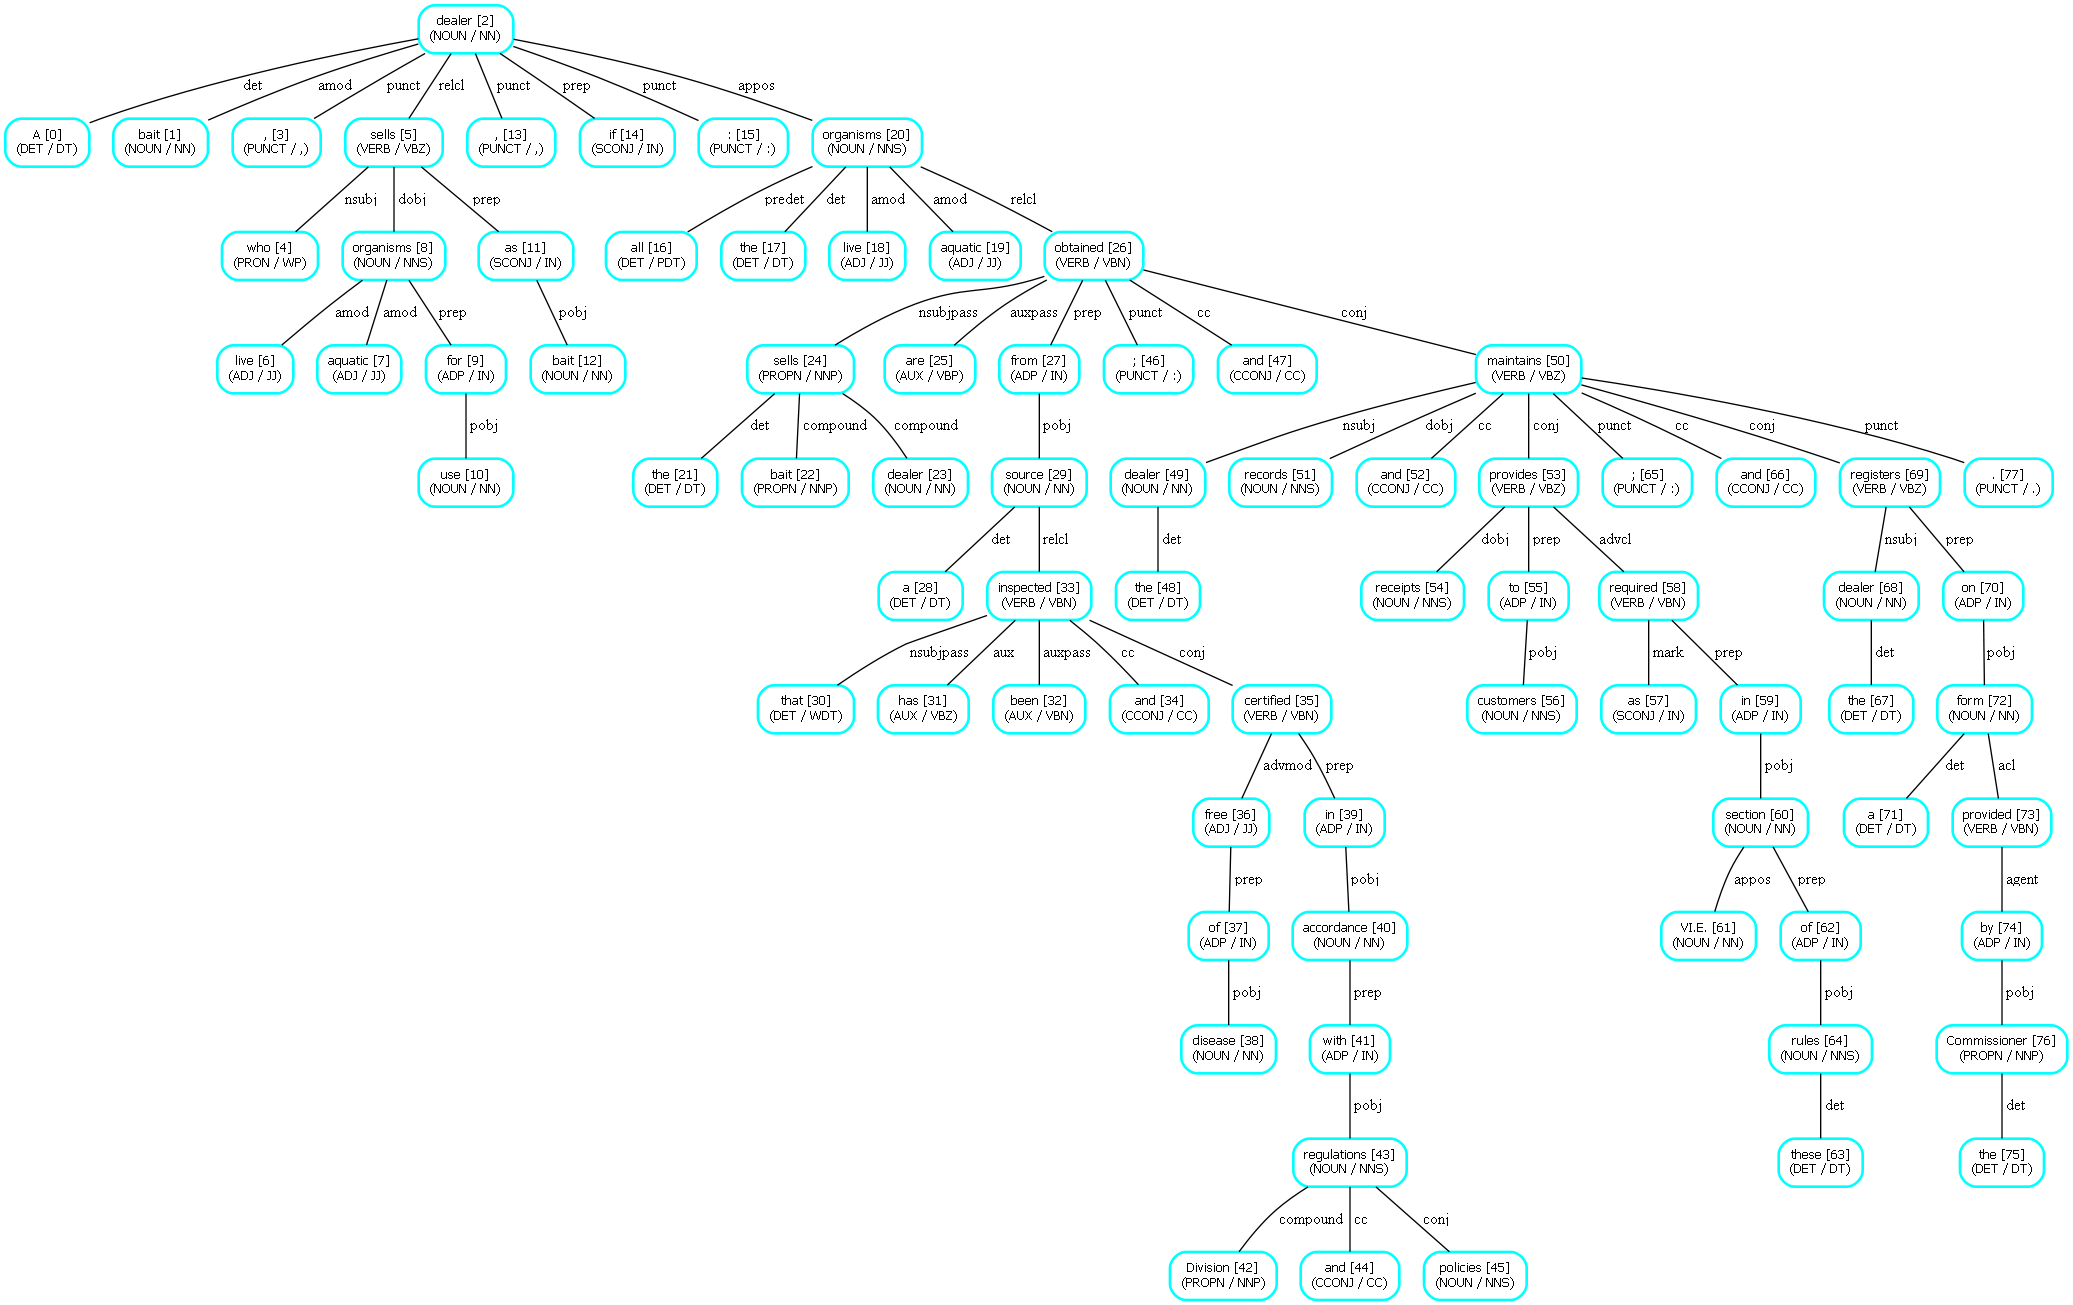

In [43]:
import visualise_spacy_tree
png = visualise_spacy_tree.create_png(doc)
from IPython.display import Image, display
display(Image(png))

In [78]:
def inorderTraversal(token):
    res = []
    for left in token.lefts:
      res = inorderTraversal(left)
    res.append(str(token.text))
    for right in token.rights:
        if (right.dep_ == "appos"):
            continue
        else:
            res = res + inorderTraversal(right)
    return res


for token in doc:
    if token.dep_ == "ROOT":
        part_one = " ".join(inorderTraversal(token))

In [90]:
part_one = "A bait dealer , who sells aquatic organisms for use as bait , if :'"

In [94]:
def inorderTraversal(token):
    res = []
    for left in token.lefts:
        res = inorderTraversal(left)
    res.append(str(token.text))
    for right in token.rights:
        if (right.dep_ == "cc") &(right.pos_ == "CCONJ") :
            continue
        if (right.dep_ == "conj") &(right.pos_ == "VERB")&(right.n_rights >= 1) :
            continue
        else:
            res = res + inorderTraversal(right)
    return res
sentences = []
for token in doc:
    if (token.dep_ == "appos") &(token.pos_ == "NOUN") &(token.n_rights == 1) :
        sentences.append(part_one + " " +" ".join(inorderTraversal(token)))
    if (token.dep_ == "conj") &(token.pos_ == "VERB")&(token.n_rights >= 1) :
        sentences.append(part_one + " " +" ".join(inorderTraversal(token)))

In [98]:
for i in sentences:
    new = re.sub(r'[^a-zA-Z0-9\s-]', '',i)
    statement = preprocessing.normalize_whitespace(new)
    print(statement + ".")
    print("\n")

A bait dealer who sells aquatic organisms for use as bait if aquatic organisms are obtained from a source been inspected.


A bait dealer who sells aquatic organisms for use as bait if certified free of disease in accordance with Division regulations policies.


A bait dealer who sells aquatic organisms for use as bait if the dealer maintains records.


A bait dealer who sells aquatic organisms for use as bait if provides receipts to customers as required in section VIE of these rules.


A bait dealer who sells aquatic organisms for use as bait if the dealer registers on a form provided by the Commissioner.


